In [99]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import yfinance as y
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [100]:
df = web.get_data_yahoo("COGN3.SA", start="2022-01-01", end="2022-03-25")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,2.51,2.36,2.49,2.39,29932000,2.39
2022-01-04,2.41,2.29,2.40,2.29,35897400,2.29
2022-01-05,2.31,2.13,2.30,2.14,45900000,2.14
2022-01-06,2.17,2.08,2.15,2.09,39746700,2.09
2022-01-07,2.13,2.04,2.09,2.07,32089200,2.07


In [101]:
df['Time'] = np.arange(len(df.index))
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Time
Date,,,,,,,
2022-01-03,2.51,2.36,2.49,2.39,29932000,2.39,0
2022-01-04,2.41,2.29,2.40,2.29,35897400,2.29,1
2022-01-05,2.31,2.13,2.30,2.14,45900000,2.14,2


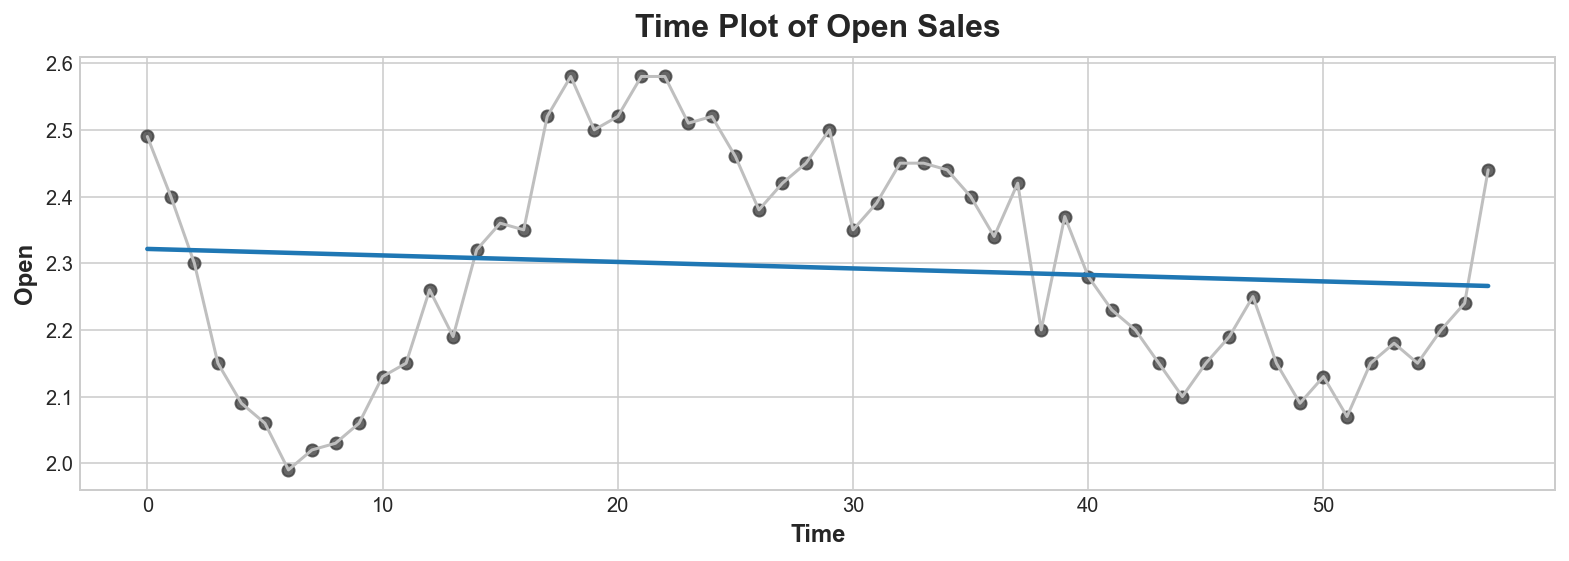

In [102]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Open', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Open', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Open Sales');

In [103]:
df['Time'] = df['Open'].shift(1)
df = df.reindex(columns=['Open', 'Time'])
df.head(3)

,Open,Time
Date,,
2022-01-03,2.49,NaN
2022-01-04,2.40,2.49
2022-01-05,2.30,2.40


Text(0.5, 1.0, 'Lag Plot of Open Sales')

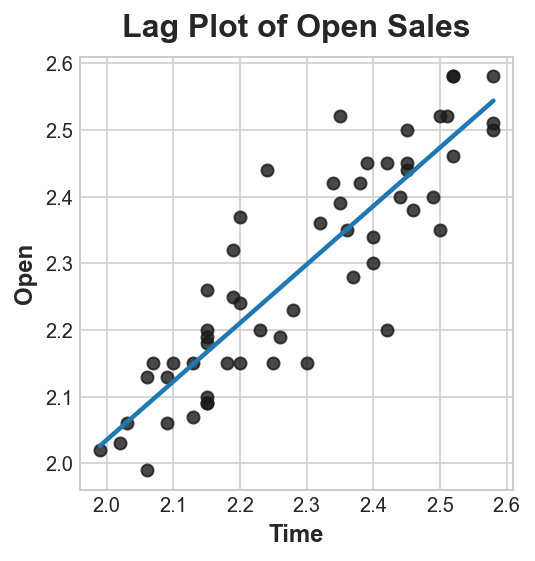

In [104]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Time', y='Open', data=df, ci=None, scatter_kws=dict(color='0.10'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Open Sales')



The procedure for fitting a linear regression model follows the standard steps for scikit-learn.


In [105]:
from sklearn.linear_model import LinearRegression
df = df.dropna()
x = df.loc[:, ['Time']] #feature
y = df.loc[:, 'Open'] #target

In [106]:
model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [107]:

y_pred = pd.Series(model.predict(x), index=x.index)

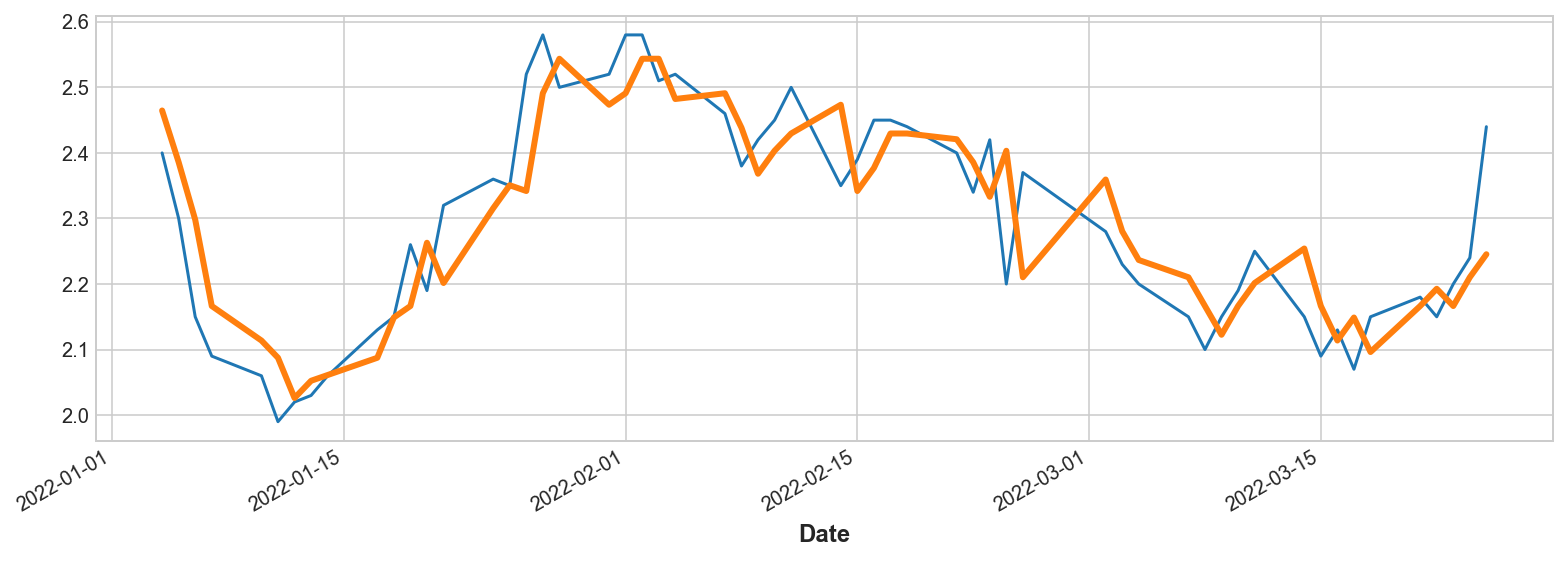

In [116]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)

In [117]:
df['Lag_1'] = df['Open'].shift(1)
df.head(3)

,Open,Time,Lag_1
Date,,,
2022-01-04,2.40,2.49,NaN
2022-01-05,2.30,2.40,2.4
2022-01-06,2.15,2.30,2.3


In [118]:

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Open']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)



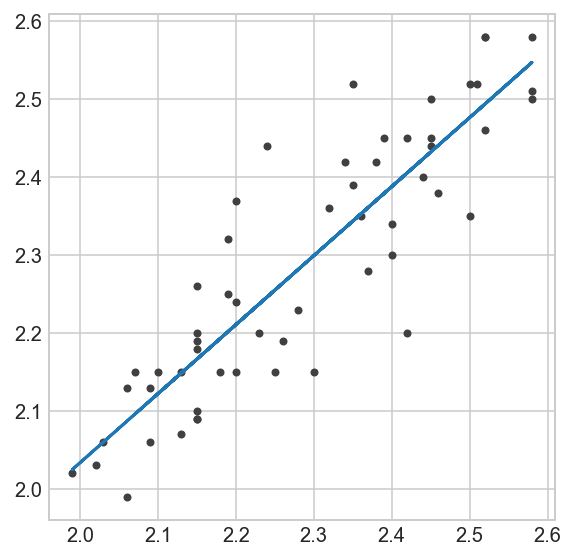

In [119]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')

In [120]:

ax = y.plot(**plot_params)
ax = y_pred.plot()

NameError: name 'plot_params' is not defined